In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.insert(1, '../')

import experiment
import pickle
from utils import *
from Architectures import *
import random, os
suppress_warnings()
EPOCHS = 256


def countp(model, params):
    tmp = model(**params)
    tmp.build(input_shape=(1,15,7))
    return tmp.count_params()


n_params = []

os.environ['PYTHONHASHSEED']=str(0)
tf.random.set_seed(42)
np.random.seed(42)
random.seed(42)

def human_format(num):
    magnitude = 0
    while abs(num) >= 1000:
        magnitude += 1
        num /= 1000.0
    # add more suffixes if you need them
    return '%.0f%s' % (num, ['', 'K', 'M', 'G', 'T', 'P'][magnitude])


filename = '../data/data80k_raw_combined_atlas_cut.pkl'
n_experiments = 8
SUFFIX = 'latent28'


#TESTING ######
# EPOCHS = 2
# filename = '../data/data50k_raw_combined_atlas_cut_small.pkl'
# n_experiments = 2
# SUFFIX = 'latent28'
###########

ERROR in cling::CIFactory::createCI(): cannot extract standard library include paths!
Invoking:
  LC_ALL=C x86_64-conda-linux-gnu-c++  -O3 -DNDEBUG -xc++ -E -v /dev/null 2>&1 | sed -n -e '/^.include/,${' -e '/^ \/.*++/p' -e '}'
Results was:
With exit code 0


Welcome to JupyROOT 6.22/08


2022-10-26 14:01:10.062394: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-10-26 14:01:10.062441: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [3]:
import seaborn as sns
import os

#to get latex to work 
os.environ['PATH'] = "%s:/usr/local/cuda-11.2/bin:/usr/local/bin:/usr/bin:/usr/local/sbin:/usr/sbin:/opt/anaconda/bin:/home/delon/texlive/bin/x86_64-linux:/home/delon/.local/bin:/home/delon/bin"%os.environ['PATH']


PIl64 = experiment.Experimenter(filename)
PIl64.fromSaved()

PI = experiment.Experimenter(filename)
PI.fromSaved(suffix=SUFFIX)

Initializing Experimenter
	Loading Data from ../data/data80k_raw_combined_atlas_cut.pkl
	Data Loaded
	Creating Splits
	Splits Created
Done initalizing
Loading Experimenter from Saved Experimenter at /data/delon/experimenter/data80k_raw_combined_atlas_cut
Experimenter Loaded
Getting split
Split Stored
Loading models
{'nested_concat_70_4_64_3': 'models/data80k_raw_combined_atlas_cut_nested_concat_70_4_64_3', 'nested_concat_general_68_3_64_3': 'models/data80k_raw_combined_atlas_cut_nested_concat_general_68_3_64_3', 'particlewise_128_4_64': 'models/data80k_raw_combined_atlas_cut_particlewise_128_4_64', 'tripletwise_5_(64, 128, 256, 128, 64)_64': 'models/data80k_raw_combined_atlas_cut_tripletwise_5_(64, 128, 256, 128, 64)_64', 'pairwise_5_(64, 128, 256, 128, 64)_64': 'models/data80k_raw_combined_atlas_cut_pairwise_5_(64, 128, 256, 128, 64)_64', 'pairwise_nl_5_(64, 128, 256, 128, 64)_32_64': 'models/data80k_raw_combined_atlas_cut_pairwise_nl_5_(64, 128, 256, 128, 64)_32_64', 'pairwise_nl_ite

2022-10-26 14:01:41.329302: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-10-26 14:01:41.329355: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2022-10-26 14:01:41.329407: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (top1.hep.utexas.edu): /proc/driver/nvidia/version does not exist
2022-10-26 14:01:41.330591: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
latent64 = PIl64.models['%s_%s'%('pairwise', PIl64.get_tail_string(model_params_dict['pairwise']))]
latent2 = PI.models['latent_two_5_(64, 128, 256, 128, 2)_64']
latent8 = PI.models['latent_eight_5_(64, 128, 256, 128, 8)_64']

In [5]:
PI.get_ROC('latent_two', model_params_dict['latent_two'])

getting ROC for latent_two
currently on latent_two_5_(64, 128, 256, 128, 2)_64


(array([0.        , 0.        , 0.        , ..., 0.98993261, 0.98993261,
        1.        ]),
 array([0.00000000e+00, 4.17327435e-05, 1.27702195e-02, ...,
        9.99958267e-01, 1.00000000e+00, 1.00000000e+00]),
 array([1.9989765e+00, 9.9897647e-01, 9.9558949e-01, ..., 3.3800386e-06,
        3.3738745e-06, 1.3812135e-10], dtype=float32),
 0.9461252998349531)

2022-10-26 14:02:20.412087: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2022-10-26 14:02:20.414434: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2397305000 Hz


In [6]:
PI.update_data(suffix=SUFFIX)

	Data Loaded
	Creating Splits
now saving paramters of experimenter
saved experimenter at /data/delon/experimenter/data80k_raw_combined_atlas_cutlatent28


In [7]:
PIl64.update_data()

	Data Loaded
	Creating Splits
now saving paramters of experimenter
saved experimenter at /data/delon/experimenter/data80k_raw_combined_atlas_cut


In [8]:
X_test_latent, y_test_latent = PI.get_test_dataset('latent_two')
X_test, y_test = PIl64.get_test_dataset('pairwise')


In [9]:
X_test_ATLAS, y_test_ATLAS = gen_dataset_high_level(PIl64.events_test, PIl64.events_oup_test, PIl64.events_tag_test)

100%|██████████| 48000/48000 [00:39<00:00, 1222.59it/s]


In [10]:
n_cut = int(len(X_test)*0.1)
n_cut = 15000
assert(len(X_test) == len(X_test_latent))

indices = np.random.permutation(len(X_test))
cut = np.s_[indices[:n_cut]]

latent_label = y_test.numpy()[cut]
latent_label_28 = y_test_latent.numpy()[cut]

In [11]:
print(n_cut)

15000


In [12]:
latent2_embedded = compute_tsne(latent2, cut=cut, X_test=X_test_latent, euclid=True)

2
computing tsne
--------------------------------------------------------------------------------
TSNE(initialization='random', n_jobs=-1, perplexity=1000, random_state=42,
     verbose=True)
--------------------------------------------------------------------------------
===> Finding 3000 nearest neighbors using Annoy approximate search using euclidean distance...
   --> Time elapsed: 29.62 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 52.58 seconds
===> Running optimization with exaggeration=12.00, lr=1250.00 for 250 iterations...
Iteration   50, KL divergence 2.6460, 50 iterations in 7.9789 sec
Iteration  100, KL divergence 1.9182, 50 iterations in 7.9122 sec
Iteration  150, KL divergence 1.9020, 50 iterations in 7.4485 sec
Iteration  200, KL divergence 1.9017, 50 iterations in 7.2488 sec
Iteration  250, KL divergence 1.9016, 50 iterations in 7.2068 sec
   --> Time elapsed: 37.80 seconds
===> Running optimization with exaggeration=1.00, lr=1250.00 for 500 iteratio

[6.0310593 8.148264 ] [8.664272 8.571225]


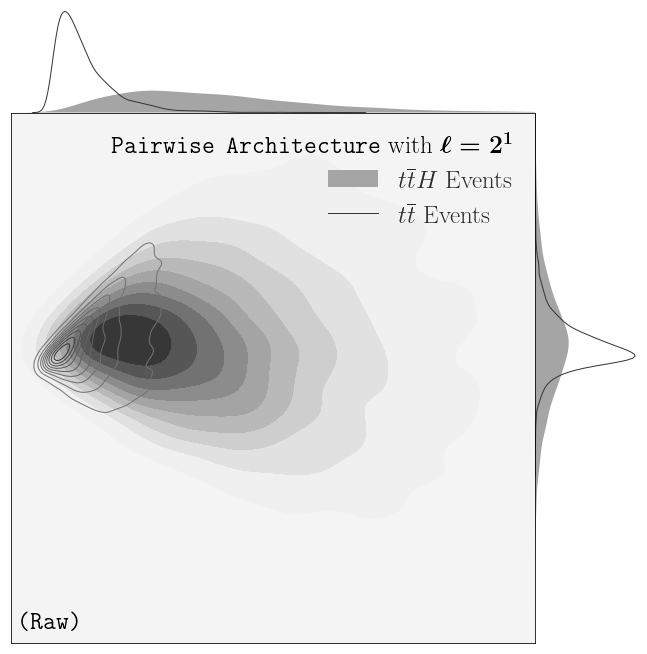

In [22]:
l2_yhat = LatentGetter(latent2.layers[0:3], condensed=True).predict(X_test_latent.numpy()[cut])
no_tsne= gen_tsne(l2_yhat, y_test_latent.numpy()[cut], text=r'{\texttt{Pairwise Architecture} with} \boldmath$\mathbf{\ell=2^1}$',
                  cmap=sns.cubehelix_palette(start=14/10, light=.97, as_cmap=True, hue=0), col_aux='#737373',
                  EMD=False, aux_text=r"\texttt{(Raw)}",
         rotated=True, log=False, bnds=True, standardized=False)
no_tsne.savefig('figures/l2_notsne.pdf')

[-2.42531920e-16 -1.04212935e-16] [16.06830735  5.95768768]


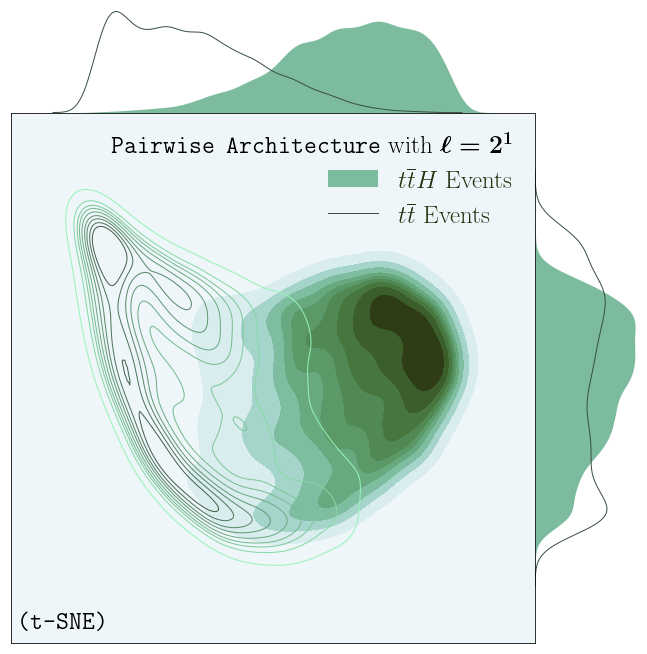

In [14]:
ax = gen_tsne(latent2_embedded, latent_label_28, text=r'{\texttt{Pairwise Architecture} with} \boldmath$\mathbf{\ell=2^1}$',
             cmap=sns.cubehelix_palette(start=14/10, light=.97, as_cmap=True), col_aux='#95f4b7',
              EMD=False)
ax.savefig('figures/l2_tsne_waxis.pdf')

[-2.42531920e-16 -1.04212935e-16] [16.06830735  5.95768768]
computing EMD with N= 15000
computed EMD with N=15000
	EMD: 0.769
earth_movers_distance 0.7687925525737918


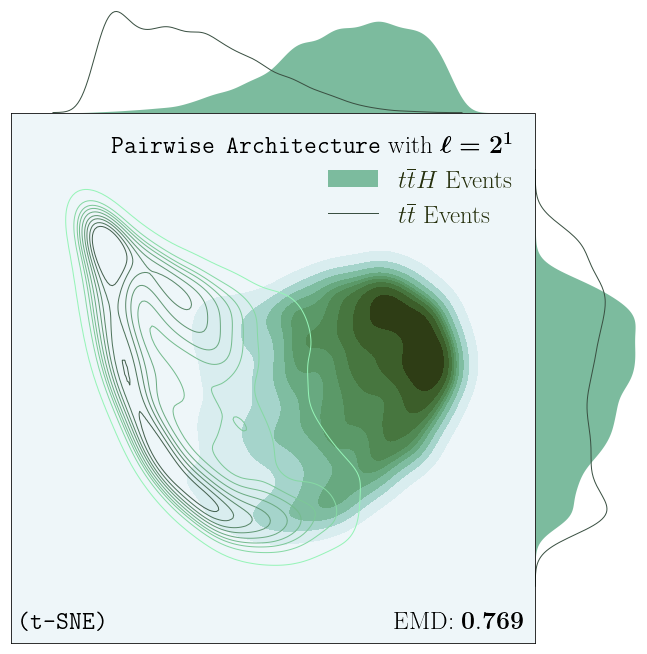

In [15]:
ax = gen_tsne(latent2_embedded, latent_label_28, text=r'{\texttt{Pairwise Architecture} with} \boldmath$\mathbf{\ell=2^1}$',
             cmap=sns.cubehelix_palette(start=14/10, light=.97, as_cmap=True), col_aux='#95f4b7')
ax.savefig('figures/l2_tsne.pdf')

In [16]:
latent64_embedded = compute_tsne(latent64, X_test=X_test, cut=cut)

64
computing tsne
--------------------------------------------------------------------------------
TSNE(initialization='random', metric='cosine', n_jobs=-1, perplexity=1000,
     random_state=42, verbose=True)
--------------------------------------------------------------------------------
===> Finding 3000 nearest neighbors using Annoy approximate search using cosine distance...
   --> Time elapsed: 14.91 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 47.44 seconds
===> Running optimization with exaggeration=12.00, lr=1250.00 for 250 iterations...
Iteration   50, KL divergence 2.5633, 50 iterations in 6.8603 sec
Iteration  100, KL divergence 2.5633, 50 iterations in 9.7325 sec
Iteration  150, KL divergence 2.5632, 50 iterations in 4.4040 sec
Iteration  200, KL divergence 2.5349, 50 iterations in 6.3329 sec
Iteration  250, KL divergence 2.5193, 50 iterations in 6.3954 sec
   --> Time elapsed: 33.73 seconds
===> Running optimization with exaggeration=1.00, lr=1250.00 f

In [17]:
ATLAS_embedded = compute_tsne_embedded(np.array(X_test_ATLAS)[cut])

8
computing tsne
--------------------------------------------------------------------------------
TSNE(initialization='random', metric='cosine', n_jobs=-1, perplexity=1000,
     random_state=42, verbose=True)
--------------------------------------------------------------------------------
===> Finding 3000 nearest neighbors using Annoy approximate search using cosine distance...
   --> Time elapsed: 25.25 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 64.10 seconds
===> Running optimization with exaggeration=12.00, lr=1250.00 for 250 iterations...
Iteration   50, KL divergence 2.6313, 50 iterations in 7.7112 sec
Iteration  100, KL divergence 2.3819, 50 iterations in 7.3738 sec
Iteration  150, KL divergence 2.3813, 50 iterations in 7.4226 sec
Iteration  200, KL divergence 2.3813, 50 iterations in 7.3972 sec
Iteration  250, KL divergence 2.3813, 50 iterations in 7.4673 sec
   --> Time elapsed: 37.37 seconds
===> Running optimization with exaggeration=1.00, lr=1250.00 fo

In [18]:
latent8_embedded = compute_tsne(latent8, cut=cut, X_test=X_test_latent)

8
computing tsne
--------------------------------------------------------------------------------
TSNE(initialization='random', metric='cosine', n_jobs=-1, perplexity=1000,
     random_state=42, verbose=True)
--------------------------------------------------------------------------------
===> Finding 3000 nearest neighbors using Annoy approximate search using cosine distance...
   --> Time elapsed: 25.43 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 58.96 seconds
===> Running optimization with exaggeration=12.00, lr=1250.00 for 250 iterations...
Iteration   50, KL divergence 2.6280, 50 iterations in 7.6976 sec
Iteration  100, KL divergence 2.4436, 50 iterations in 7.7839 sec
Iteration  150, KL divergence 2.4405, 50 iterations in 8.1018 sec
Iteration  200, KL divergence 2.4405, 50 iterations in 8.5635 sec
Iteration  250, KL divergence 2.4405, 50 iterations in 8.6452 sec
   --> Time elapsed: 40.79 seconds
===> Running optimization with exaggeration=1.00, lr=1250.00 fo

[-6.21488046e-16 -1.91372843e-16] [10.44779615  7.57818094]
computing EMD with N= 15000
computed EMD with N=15000
	EMD: 0.584
earth_movers_distance 0.5842135695743712


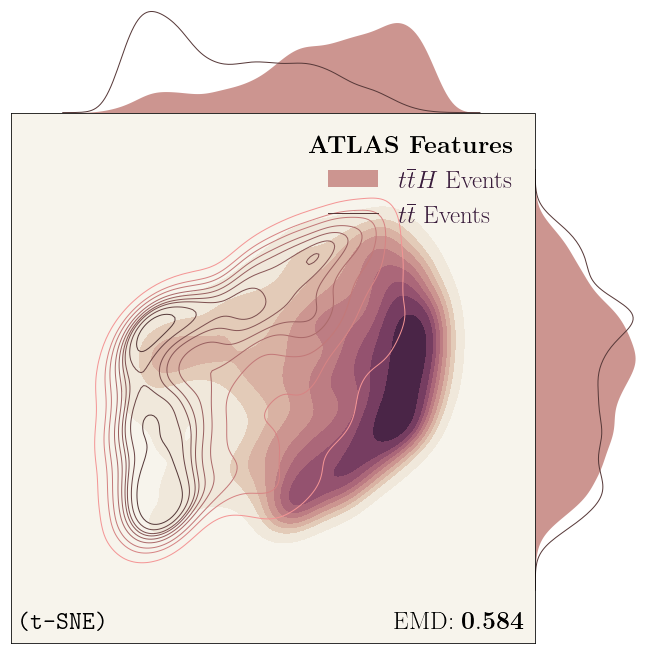

In [19]:
axATLAS = gen_tsne(ATLAS_embedded, latent_label, text=r'\textbf{ATLAS Features}',
                   cmap = sns.cubehelix_palette(start=2/10, light=.97, as_cmap=True), col_aux='#f49595')
axATLAS.savefig('figures/ATLAS_tsne.pdf')

[5.30538576e-17 1.51582450e-16] [4.66358138 9.61463138]
computing EMD with N= 15000
computed EMD with N=15000
	EMD: 0.766
earth_movers_distance 0.7655134004061617


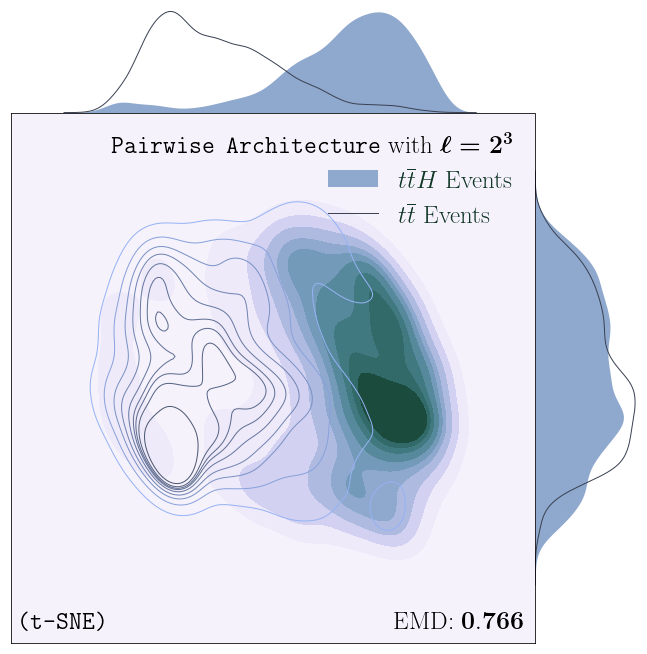

In [20]:
ax = gen_tsne(latent8_embedded, latent_label_28, text=r'{\texttt{Pairwise Architecture} with} \boldmath$\mathbf{\ell=2^3}$',
              cmap=sns.cubehelix_palette(start=20/10, light=.97, as_cmap=True), col_aux='#95b3f4')
ax.savefig('figures/l8_tsne.pdf')

[1.51582450e-17 8.33703477e-17] [6.24989985 5.47087435]
computing EMD with N= 15000
computed EMD with N=15000
	EMD: 0.807
earth_movers_distance 0.8072507927189967


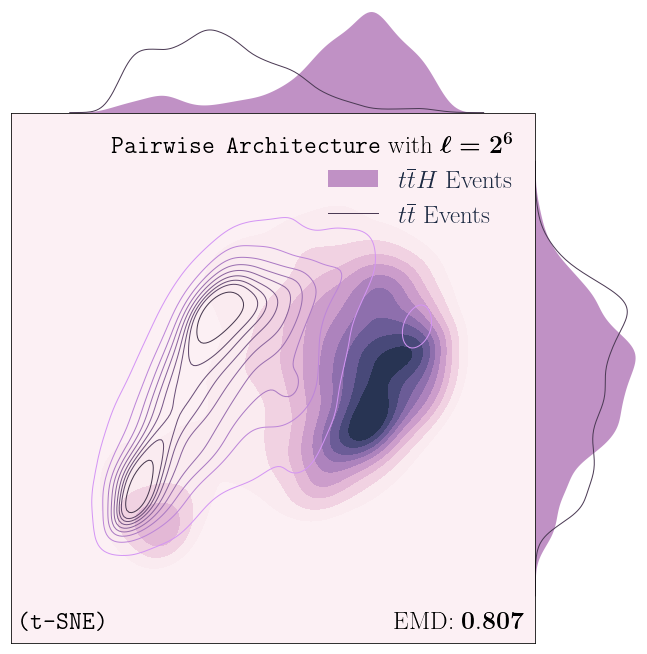

In [21]:
axl64 = gen_tsne(latent64_embedded, latent_label, text=r'{\texttt{Pairwise Architecture} with} \boldmath$\mathbf{\ell=2^6}$ ',
                )
axl64.savefig('figures/l64_tsne.pdf')